# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

Se cargan las librerías `Pandas` y `Pyplot` de `MatPlotLib`.

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv('/datasets/vehicles_us.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

In [3]:
# imprime la información general/resumida sobre el DataFrame
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
data.head(5)



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


La columna `date_posted` esta guardada como objeto, se deberá cambiar a Datetime para poder trabajar con ella.
Por otra parte la columna `is_4wd` tiene valores ausentes, se asume que la columna son de datos booleanos por los que los valores ausentes se sustuirán por *False* y los que tienen valor de 1.0 se transformarán en *True*.
En las columnas `model_year`, `cylinders`,  `odometer` y, `paint_color` se deberá hacer investigación más a fondo para poder eliminar los valores ausentes.

In [5]:
data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

La columna *date_posted*, como se mencionó anteriormente debe ser una columna de tipo `Datetime`.

In [6]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Hay varias columnas con datos ausentes, `model_year`, `cylinders`, `odometer`, `paint` y, `is_4wd`.
La columna `is_4wd`, es la columna con la que se podrá trabajar ràpidamente para sustituir los valores ausentes.

### Conclusiones y siguientes pasos

Los datos no están completos en su totalidad, esto no es normal, ya que se está hablando de características específicas de los autos.
Los datos ausentes, excepto por la columna `is_4wd`, son omisiones de ingreso, o por que no se conoce realmente la información por lo que se tendrá que investigar más para poder encontrar un patrón o un valor para poder sustiuirlos en los datos.
Por otro lado la columna `date_posted`, tiene un tipo de dato incorrecto, el cual se cambiará por *DateTime* dejando todos los valores como fecha correctamente.

## Tratar los valores ausentes (si hay)

Primero se van a sustituir los valores en la columna `is_4wd`, se sustituirán los valores ausentes por *0.0*, ya que los autos que cuentan con transmisión en las 4 ruedas tiene un valor de *1.0*

In [7]:
data['is_4wd'].fillna(0.0,inplace=True)
data['is_4wd'].head(5)

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: is_4wd, dtype: float64

In [8]:
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Con esto la columna deja de tener valores ausentes.

Para la columna `paint_color`, primero se contarán los diferentes tipos de colores del grupo de autos en los datos

In [9]:
print(data['paint_color'].value_counts())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


De esta columna se revisará la cantidad de valores ausentes contra los autos que se tienen

In [10]:
print(data['paint_color'].isna().sum()/len(data))

0.17985443959243086


Los datos ausentes de la columna `paint_color` son el 17% de los datos, por lo que se sustituirán, al no conocer el color real de los autos lo sustituiremos por el dato custom.

In [11]:
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [12]:
data['paint_color'].fillna('custom',inplace=True)
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [13]:
data['paint_color'].value_counts()

custom    10420
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

Para las columnas restantes con valores ausentes, `model_year`, `cylinders` y, `odometer`. Se va a buscar la descripción de estas columnas y se sustituirán por el valor de la mediana.

In [14]:
data[['model_year','cylinders','odometer']].describe()

,model_year,cylinders,odometer
count,47906.000000,46265.000000,43633.000000
mean,2009.750470,6.125235,115553.461738
std,6.282065,1.660360,65094.611341
min,1908.000000,3.000000,0.000000
25%,2006.000000,4.000000,70000.000000
50%,2011.000000,6.000000,113000.000000
75%,2014.000000,8.000000,155000.000000
max,2019.000000,12.000000,990000.000000


In [15]:
data['model_year'].fillna(data.groupby('model')['model_year'].transform("median"),inplace=True)
data['cylinders'].fillna(data.groupby('type')['cylinders'].transform("median"),inplace=True)

In [16]:
data['odometer'].fillna(data.groupby(['model_year','condition'])['odometer'].transform("median"),inplace=True)
data['odometer'].fillna(data.groupby('condition')['odometer'].transform("median"),inplace=True)

In [17]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [18]:
data.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

## Corregir los tipos de datos

Se cambiará el tipo de datos de la columna `date_posted` para ajustar a fecha y no a objeto

In [19]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


Columnas `cylinders`y `odometer`, la convertiremos en tipo *Entero*.

In [20]:
data['cylinders'] = data['cylinders'].astype('int64')
data['odometer'] = data['odometer'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 5.1+ MB


## Enriquecer datos

In [21]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
data['extended_date_posted'] = data['date_posted'] + pd.Timedelta(hours=12)

In [22]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,extended_date_posted
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,custom,1.0,2018-06-23,19,2018-06-23 12:00:00
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018-10-19 12:00:00
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019-02-07 12:00:00
3,1500,2003.0,ford f-150,fair,8,gas,193850,automatic,pickup,custom,0.0,2019-03-22,9,2019-03-22 12:00:00
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019-04-02 12:00:00


In [23]:
# Agrega los años del vehículo cuando el anuncio se colocó
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year
data['car_age'] = data['year_posted'] - data['model_year'] + 1
data['car_age'].head(5)

0     8.0
1     8.0
2     7.0
3    17.0
4     3.0
Name: car_age, dtype: float64

In [24]:
# Agrega el millaje promedio del vehículo por año
data['mill_per_year'] = data['odometer'] / data['car_age']

In [25]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
print(data['condition'].value_counts())



excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


Se cambiarán los valores de la columna `condition` por los siguientes valores:
   - *excellent: 3*
   - *good: 2*
   - *ike new: 4*
   - *fair: 1*
   - *new: 5*
   - *salvage: 0*

In [26]:
dict_condition = {
    'new' : 5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}

In [27]:
data['condition_n'] = data['condition'].replace(dict_condition)
data['condition_n'].head(5)

0    2
1    2
2    4
3    1
4    3
Name: condition_n, dtype: int64

## Comprobar datos limpios

In [28]:
# imprime la información general/resumida sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  float64       
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  float64       
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  extended_date_po

In [29]:
data.isna().sum()

price                   0
model_year              0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
transmission            0
type                    0
paint_color             0
is_4wd                  0
date_posted             0
days_listed             0
extended_date_posted    0
year_posted             0
car_age                 0
mill_per_year           0
condition_n             0
dtype: int64

In [30]:
# imprimir una muestra de datos
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,extended_date_posted,year_posted,car_age,mill_per_year,condition_n
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,custom,1.0,2018-06-23,19,2018-06-23 12:00:00,2018,8.0,18125.000000,2
1,25500,2011.0,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50,2018-10-19 12:00:00,2018,8.0,11088.125000,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019-02-07 12:00:00,2019,7.0,15714.285714,4
3,1500,2003.0,ford f-150,fair,8,gas,193850,automatic,pickup,custom,0.0,2019-03-22,9,2019-03-22 12:00:00,2019,17.0,11402.941176,1
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019-04-02 12:00:00,2019,3.0,26967.666667,3
5,14990,2014.0,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,2018-06-20 12:00:00,2018,5.0,11590.800000,3
6,12990,2015.0,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0.0,2018-12-27,73,2018-12-27 12:00:00,2018,4.0,19803.000000,3
7,15990,2013.0,honda pilot,excellent,6,gas,109473,automatic,SUV,black,1.0,2019-01-07,68,2019-01-07 12:00:00,2019,7.0,15639.000000,3
8,11500,2012.0,kia sorento,excellent,4,gas,104174,automatic,SUV,custom,1.0,2018-07-16,19,2018-07-16 12:00:00,2018,7.0,14882.000000,3
9,9200,2008.0,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,1.0,2019-02-15,17,2019-02-15 12:00:00,2019,12.0,12265.916667,3


## Estudiar parámetros principales
Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  float64       
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  float64       
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  extended_date_po

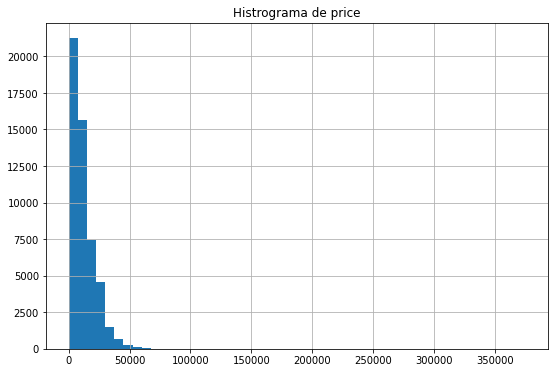

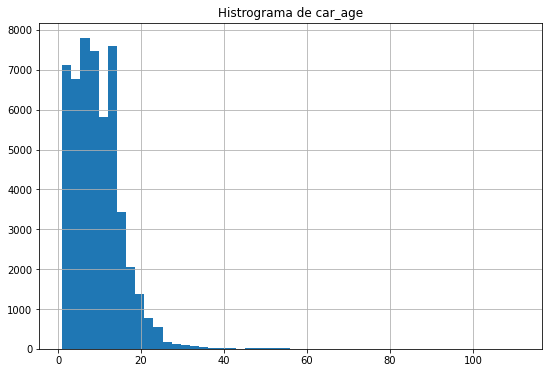

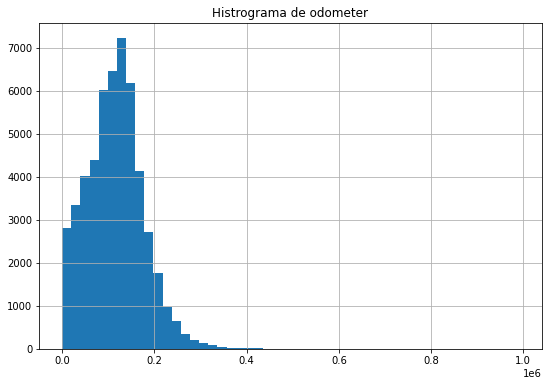

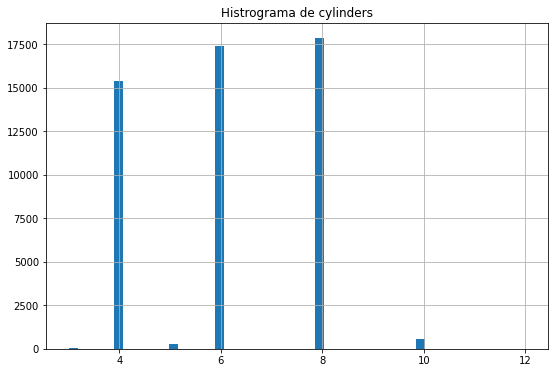

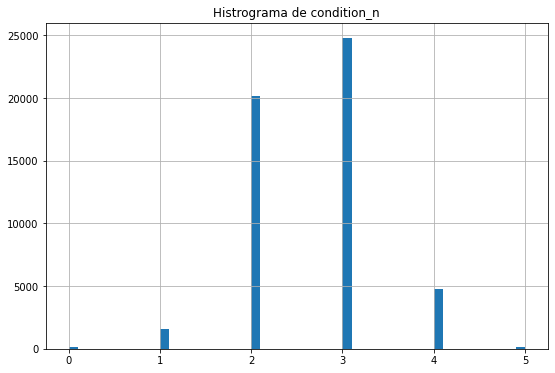

In [32]:
numerical = ['price','car_age','odometer','cylinders','condition_n']

for col in numerical:
    plt.figure(figsize=(9,6))
    plt.title(f"Histrograma de {col}")
    data[col].hist(bins=50)
    plt.show()

## Estudiar y tratar valores atípicos

Se crea una copia del DataFrame para trabajar con los valores sin modificar el original

In [33]:
data_filtered = data.copy()

In [34]:
for col in numerical:
    #Valor de límite inferior:
    outlier_inf = data[col].quantile(0.25)-1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
    
    #Valor de límite superior:
    outlier_sup = data[col].quantile(0.75)+1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
    
    #Filtrado de DataFrame filtrado:
    data_filtered = data_filtered[(data_filtered[col]<outlier_sup)&(data_filtered[col]>outlier_inf)]

In [35]:
print(data_filtered.shape, data.shape)

(48171, 18) (51525, 18)


## Estudiar parámetros principales sin valores atípicos

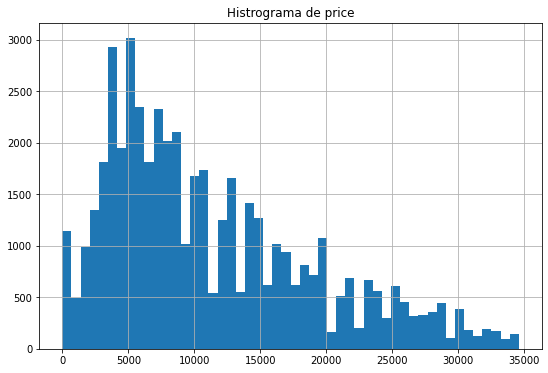

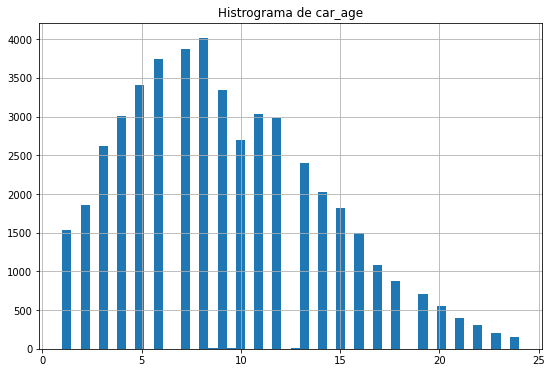

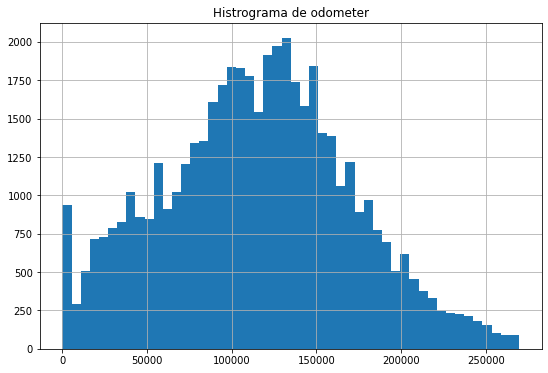

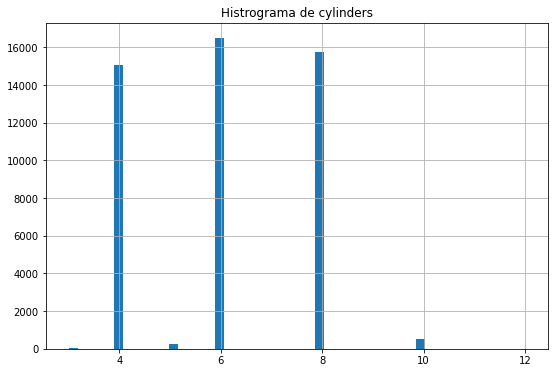

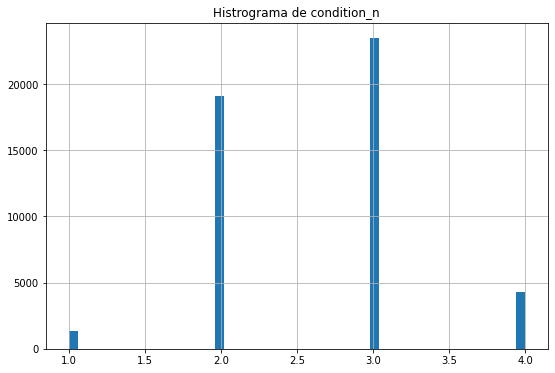

In [36]:
for col in numerical:
    plt.figure(figsize=(9,6))
    plt.title(f"Histrograma de {col}")
    data_filtered[col].hist(bins=50)
    plt.show()

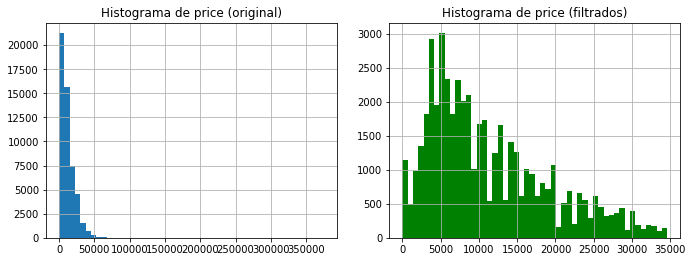

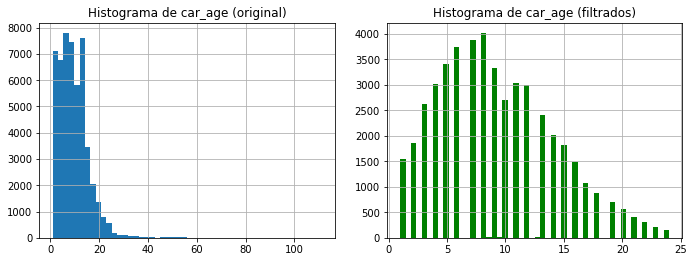

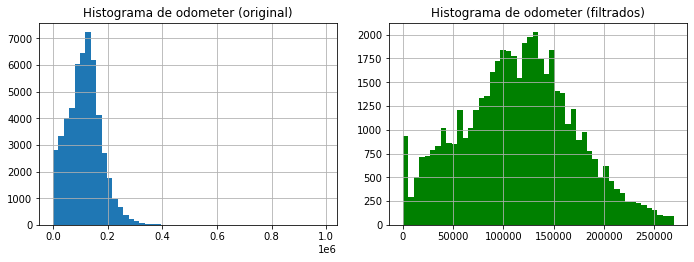

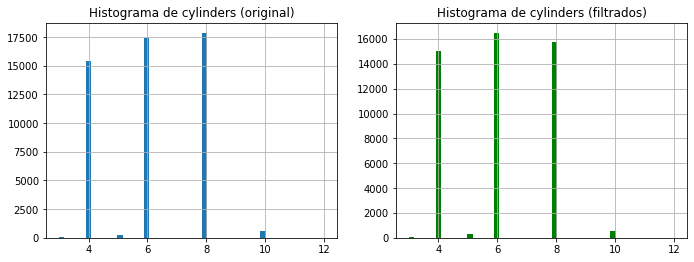

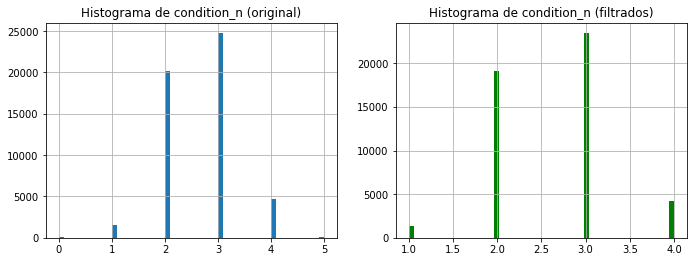

In [37]:
for col in numerical:
    fig,ax = plt.subplots(ncols=2,figsize=(10,4))
    
    ax[0].set_title(f'Histograma de {col} (original)')
    data[col].hist(bins=50,ax=ax[0])
    ax[1].set_title(f'Histograma de {col} (filtrados)')
    data_filtered[col].hist(bins=50,ax=ax[1],color='green')
    fig.tight_layout(pad=2.0)

## Periodo de colocación de los anuncios

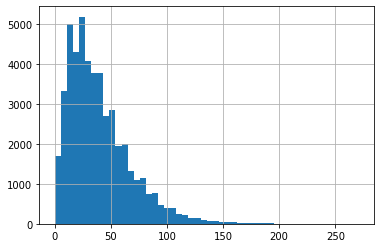

In [38]:
data_filtered['days_listed'].sort_values(ascending=False).hist(bins=50)
plt.show()

In [39]:
print('La mediana es:', data_filtered['days_listed'].median())
print('La media es:', data_filtered['days_listed'].mean())

La mediana es: 33.0
La media es: 39.541653692055384


El promedio de días que dura un auto publicado en la página es de 39.54 días, siendo la mediana de 33 días. Dentro de los valores se tiene un valor máximo de 271 días de publicación del auto en la página, este valor es atípico para nuestro conjunto de datos, así como el mínimo que es de 0 días, es decir, el mismo día en que se público se vendió o se retiro el anuncio del auto.

## Precio promedio por cada tipo de vehículo

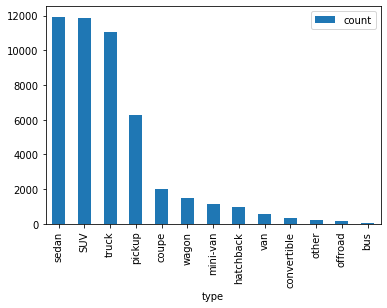

In [40]:
data_grouped_type = (
    data_filtered.groupby('type')['price']
    .agg(['count','mean'])
    .reset_index()
)

data_grouped_type.sort_values(by='count',ascending=False).plot(kind='bar',x='type',y='count')
plt.show()


## Factores de precio

In [41]:
popular_types = data_grouped_type.sort_values(by='count',ascending=False).head(2)
popular_types

,type,count,mean
9,sedan,11935,6973.249770
0,SUV,11880,10452.704714


In [42]:
data_popular_types = data_filtered[data_filtered['type'].isin(popular_types['type'])]

In [43]:
data_popular_types

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,extended_date_posted,year_posted,car_age,mill_per_year,condition_n
0,9400,2011.0,bmw x5,good,6,gas,145000,automatic,SUV,custom,1.0,2018-06-23,19,2018-06-23 12:00:00,2018,8.0,18125.000000,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79,2019-02-07 12:00:00,2019,7.0,15714.285714,4
4,14900,2017.0,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28,2019-04-02 12:00:00,2019,3.0,26967.666667,3
5,14990,2014.0,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,1.0,2018-06-20,15,2018-06-20 12:00:00,2018,5.0,11590.800000,3
6,12990,2015.0,toyota camry,excellent,4,gas,79212,automatic,sedan,white,0.0,2018-12-27,73,2018-12-27 12:00:00,2018,4.0,19803.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005.0,ford taurus,excellent,6,gas,110200,automatic,sedan,silver,0.0,2018-08-10,63,2018-08-10 12:00:00,2018,14.0,7871.428571,3
51520,9249,2013.0,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0.0,2018-10-03,37,2018-10-03 12:00:00,2018,6.0,14689.333333,4
51522,3950,2009.0,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0.0,2018-11-15,32,2018-11-15 12:00:00,2018,10.0,12800.000000,3
51523,7455,2013.0,toyota corolla,good,4,gas,139573,automatic,sedan,black,0.0,2018-07-02,71,2018-07-02 12:00:00,2018,6.0,23262.166667,2


In [44]:
data_popular_types['type'].unique()

array(['SUV', 'sedan'], dtype=object)

In [45]:
parametros = ['price','car_age','odometer','condition_n']
data_n = data_popular_types[parametros]
data_n.corr()

,price,car_age,odometer,condition_n
price,1.000000,-0.517143,-0.468054,0.247413
car_age,-0.517143,1.000000,0.629087,-0.301278
odometer,-0.468054,0.629087,1.000000,-0.343894
condition_n,0.247413,-0.301278,-0.343894,1.000000


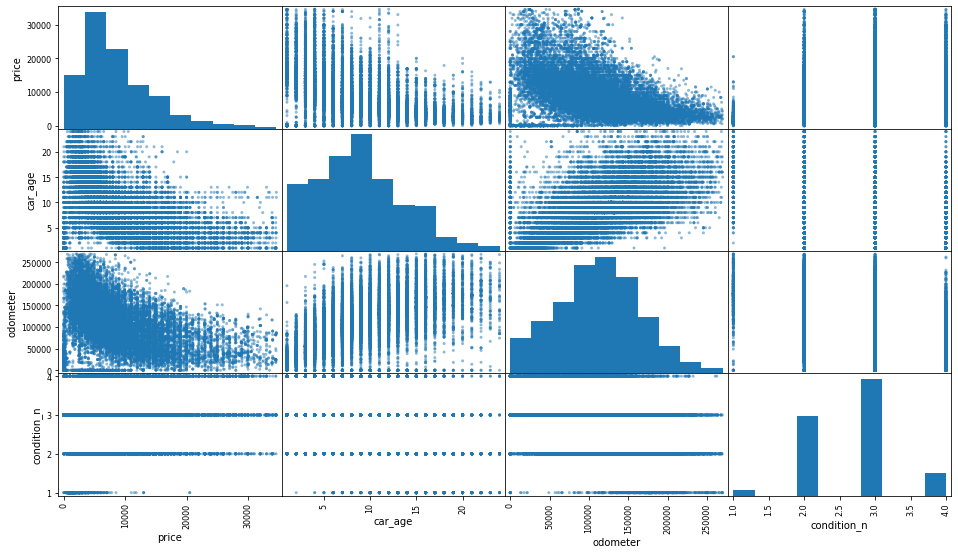

In [46]:
pd.plotting.scatter_matrix(data_n, figsize=(16,9))
plt.show()

In [47]:
data_popular_types['paint_color'].value_counts()

custom    4872
black     3839
silver    3555
white     3344
grey      2747
blue      2222
red       1798
green      615
brown      605
orange      90
yellow      66
purple      62
Name: paint_color, dtype: int64

In [48]:
data_popular_types['transmission'].value_counts()

automatic    22495
manual        1031
other          289
Name: transmission, dtype: int64

<Figure size 648x432 with 0 Axes>

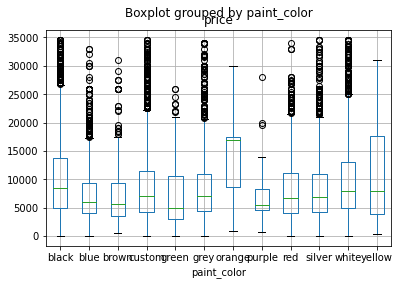

<Figure size 648x432 with 0 Axes>

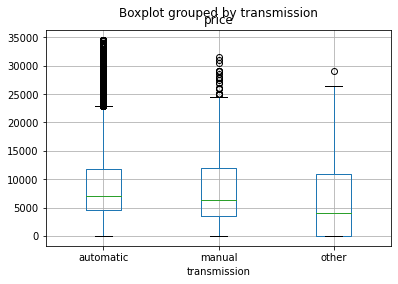

In [49]:
categoricas = ['paint_color','transmission']

for col in categoricas:
    plt.figure(figsize=(9,6))
    data_popular_types.boxplot(column='price',by=col)
    plt.show()

In [50]:
data_popular_types['condition_n'].value_counts()

3    12418
2     8445
4     2398
1      554
Name: condition_n, dtype: int64

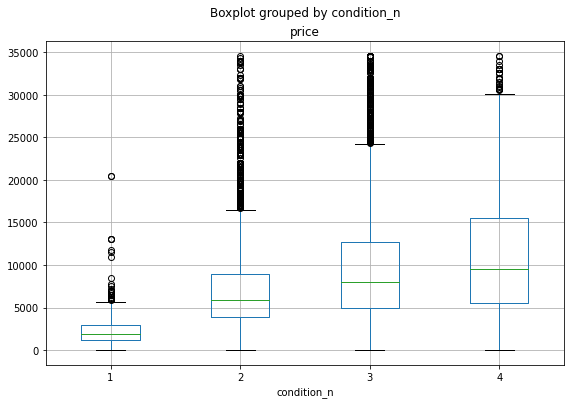

In [51]:
(data_popular_types
     .boxplot(column='price',by='condition_n',figsize=(9,6))
    )
plt.show()

## Conclusión general

Pasos para tratar los datos:
- Se trabajó en la columna `is_4wd` la cual se cambiaron los valores ausentes por un 0, y los valores *`True`* se cambiaron por un 1, esto para evitar tener una columna con datos booleanos.
- La columna `paint_color`al ser una columna con valores de objeto o categóricos, y no contar con más información al respecto se sustituyen los valores ausentes por el valor de *`custom`*.
- Las columnas `model_year`, `cylinders`, y, `odometer` se sustituyeron los valores ausentes con las medianas de las columnas.
- A la columna de `date_posted` se cambio el tipo de datos a Datetime.
- Se adiciona la columna `car_age` restando del año de publicación del aviso con el año del modelo.
- Se agregó la columna del millaje por año de cada auto, diviendo el valor del odometro entre la edad del auto.
- Se adicionó una columna con la fecha y hora de publicación del anuncio, al no contar con datos precisos de las horas de publicación se colocó como 12:00 horas fue cuando se publicó el anuncio.
- La columna `condition` se cambiaron los valores por númericos, esto para poder clasificar mejor los datos.
Con estos pasos el data frame quedó sin valores ausentes y de forma adecuada para iniciar la exploración de datos.

Al inicio se crearon histogramas con las columnas importantes, las cuales se cree que afectan al precio del auto, estas columnas son: `price`, `car_age`, `odometer`, `cylinders`, `condition`. Con los histrogramas se encontró que existen muchos valores atípicos dentro de cada columna, por lo que se calcularon los límites superior e inferior para cada columna y se filtró el dataframe para dejar los valores típicos a usar.
Con los valores típicos se gráficaron nuevamente los histrogramas para verificar la distribución de los datos, con lo que se encontraron histogramas con una distribución muy parecida a la normal.

Con el dataframe filtrado también se cálculo la mediana y la media de los días de publicación del anuncio, donde el tiempo es de 39 días de publicación del anuncio. Con la información que tenemos es dificil saber si los anuncios dejan de estar publicados o si siguen activos.

En conclusión de este análisis, se realizo una matriz de correlaciones con las columnas `price`, `car_age`, `odometer`, con la información de los dos tipos de vehículos más populares, con esto se encontró que el precio tiene una relación negativa débil con el millaje del auto, es decir a menor millaje mayor precio, con la edad del auto la relación se muestra un tanto más fuerte que el millaje, sin embargo también es negativo, a mayor edad, menor precio.

*Esto tiene lógica ya que la teoría menciona que a mayor desgaste de una máquina es menor el precio de venta.*

En cuanto a la transmisión y los colores no hay una relación fuerte, es decir no muestra el precio dependencia de esto para el aumento o disminución de precio.
